In [13]:
!pip install ucimlrepo
!pip install pycausal
!pip install cdt
!pip install causalearn
!pip install gcastle
!pip install notears
!pip install lingan
!pip install torch
!pip install --upgrade pip

ERROR: Could not find a version that satisfies the requirement py-causal (from versions: none)
ERROR: No matching distribution found for py-causal

[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement notears (from versions: none)
ERROR: No matching distribution found for notears

[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement lingan (from versions: none)
ERROR: No matching distribution found for lingan

[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement py-causal (from versions: none)
ERROR: No matching distribution found for py-causal

[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement notears (from versions: none)
ERROR: No matching distribution found for notears

[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement lingan (from versions: none)
ERROR: No matching distribution found for lingan

[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

wine_quality = fetch_ucirepo(id=186)
X = wine_quality.data.features
y = wine_quality.data.targets


wine_data = pd.DataFrame(X)
wine_data["quality"] = pd.DataFrame(y)


In [8]:
from cdt.causality.graph import PC
import networkx as nx
import matplotlib.pyplot as plt

data = wine_data.sample(1000)

model = PC()
output_graph = model.predict(data)

# Visualize the directed graph
pos = nx.spring_layout(output_graph)
nx.draw_networkx(output_graph, pos,
                 node_size=50, font_size=4)
nx.draw_networkx_edge_labels(output_graph, pos,
                             font_size=3)

plt.savefig("CDT_PC.pdf")

ImportError: R Package (k)pcalg/RCIT is not available. RCIT has to be installed from https://github.com/Diviyan-Kalainathan/RCIT

In [ ]:
from pycausal.pycausal import pycausal as pc
from pycausal import prior as p

pc = pc()
pc.start_vm()

data = wine_data.sample(1000).astype(float)  # must be float
result = pc.tetradrunner(
    testId='fci',
    dataType='continuous',
    dataset=data,
    maxPathLength=-1,
    faithfulnessAssumed=True,
    verbose=False
)

print(result.getTetradGraph())


In [5]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.GraphUtils import GraphUtils
import numpy as np

# Use smaller sample for speed
data = wine_data.sample(1000).to_numpy()

# PC algorithm
graph = pc(data, alpha=0.05)

# Visualize
GraphUtils.to_pydot(graph.G, labels=wine_data.columns).write_png("wine_graph.png")


  0%|          | 0/12 [00:00<?, ?it/s]

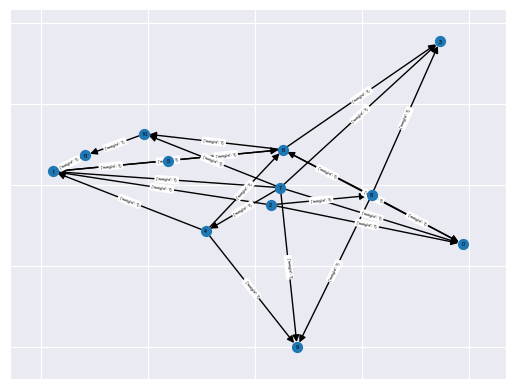

In [6]:
from castle.algorithms import PC
import networkx as nx
import pandas as pd

# Use smaller sample
data = wine_data.sample(1000).to_numpy()

model = PC()
model.learn(data)

G = nx.from_numpy_array(model.causal_matrix, create_using=nx.DiGraph)
layout = nx.spring_layout(G)

nx.draw_networkx(G, layout, with_labels=True,
                 node_size=50, font_size=4)
nx.draw_networkx_edge_labels(G, pos=layout,
                             font_size=3)

plt.savefig("GCastle_PC.pdf")


In [22]:
from notears.linear import notears_linear
import numpy as np

X = wine_data.sample(1000).to_numpy()  # NOTEARS assumes continuous data
W_est = notears_linear(X, lambda1=0.01)

print(W_est)  # Adjacency matrix of causal structure


ModuleNotFoundError: No module named 'notears'

In [23]:
from lingam import DirectLiNGAM
import numpy as np

model = DirectLiNGAM()
X = wine_data.sample(1000).to_numpy()

model.fit(X)

# Print adjacency matrix
print(model.adjacency_matrix_)


ModuleNotFoundError: No module named 'lingam'

INFERENCE

In [7]:
!pip install dowhy
from dowhy import CausalModel

# Example: Let's assume 'alcohol' is the treatment
model = CausalModel(
    data=wine_data,
    treatment='alcohol',
    outcome='quality',
    common_causes=['volatile acidity', 'sulphates', 'pH', 'density']
)

identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
print("Estimated Effect:", estimate.value)


2025-05-13 13:05:05,513 - C:\Users\dnedi\PycharmProjects\CausalDiscoveryProject\venv\lib\site-packages\dowhy\causal_model.py[line:77] - WARNING: Causal Graph not provided. DoWhy will construct a graph based on data inputs.
2025-05-13 13:05:05,514 - C:\Users\dnedi\PycharmProjects\CausalDiscoveryProject\venv\lib\site-packages\dowhy\causal_model.py[line:506] - INFO: Model to find the causal effect of treatment ['alcohol'] on outcome ['quality']
1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
2025-05-13 13:05:05,515 - C:\Users\dnedi\PycharmProjects\CausalDiscoveryProject\venv\lib\site-packages\dowhy\causal_model.py[line:588] - WARNING: The graph defines 6 variables. 5 were found in the dataset and will be analyzed as observed variables. 1 were not found in the dataset and will be analyzed as unobserved variables. The observed variables are: '['alcohol', 'density', 'pH', 'quality', 'su

Estimated Effect: None
